In [1]:
# Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing 

In [2]:
# setting the path
os.chdir("C:\\Users\\gunes\\Desktop\\Repeat")
os.getcwd()

'C:\\Users\\gunes\\Desktop\\Repeat'

In [3]:
# loading the datasets
ireland_data = pd.read_csv("Ireland.csv")
canada_data = pd.read_csv("Canada.csv")
india_data = pd.read_csv("India.csv")

#### CoLumns of the datasets

In [4]:
#Ireland

# Get the list of all column names from headers
column_headers = list(ireland_data.columns.values)
print("The Column Header :", column_headers)


The Column Header : ['price', 'address', 'bathroom', 'bedroom', 'furnish', 'description', 'property type', 'ID', 'longitude', 'latitude']


In [5]:
#Canada

# Get the list of all column names from headers
column_headers = list(canada_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Bedroom', 'Bathroom', 'Den', 'Address', 'Lat', 'Long', 'Price']


In [6]:
#India

# Get the list of all column names from headers
column_headers = list(india_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']


In [7]:
ireland_data.head()

,price,address,bathroom,bedroom,furnish,description,property type,ID,longitude,latitude
0,8400.0,"Sorrento Road, Dalkey, South Co. Dublin",5,5,Furnished,"\n Rent is 1,200 per n...",House,21612293,-6.096875,53.274311
1,15000.0,"Ailesbury Road, Ballsbridge, Dublin 4, South D...",6,6,Furnished,\n Knight Frank are ple...,House,22045922,-6.217086,53.320058
2,15000.0,"5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...",5,5,Unfurnished,\n REA Halnon McKenna a...,House,22048233,-6.236891,53.330032
3,10000.0,"Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...",5,4,Unfurnished,\n Professionally Manag...,House,22043562,-6.233272,53.329613
4,9400.0,"3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...",5,3,Unfurnished,\n AVAILABLE JANUARY 20...,House,22059358,-6.100353,53.276994


In [8]:
canada_data.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


In [9]:
india_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Exploratory data analysis

#### 1. Ireland dataset

In [10]:
#checking the number of rows and column
ireland_data.shape

(2718, 10)

The data has 10 columns and 2718 rows

In [11]:
#checking the missing value
ireland_data.isnull().sum()

price              0
address            0
bathroom           0
bedroom            0
furnish           12
description      584
property type      0
ID                 0
longitude          0
latitude           0
dtype: int64

In [12]:
#Dropping the description column
ireland_data.drop(['description'], axis=1)

#Dropping the rows with missing values
ireland_data.dropna(inplace=True)

#confirming whether the row with missing value were deleted
ireland_data.isnull().sum()

price            0
address          0
bathroom         0
bedroom          0
furnish          0
description      0
property type    0
ID               0
longitude        0
latitude         0
dtype: int64

In [13]:
ireland_data.drop(columns=['address','description','ID','longitude','latitude'],inplace = True)

In [14]:
#first 5 rows
ireland_data.head()


,price,bathroom,bedroom,furnish,property type
0,8400.0,5,5,Furnished,House
1,15000.0,6,6,Furnished,House
2,15000.0,5,5,Unfurnished,House
3,10000.0,5,4,Unfurnished,House
4,9400.0,5,3,Unfurnished,House


In [15]:
#Descriptive statistics
ireland_data.describe()

,price,bathroom,bedroom
count,2131.000000,2131.000000,2131.000000
mean,2154.280150,2.040826,1.560300
std,1016.798815,1.081524,0.832159
min,150.000000,0.000000,0.000000
25%,1655.000000,1.000000,1.000000
50%,1995.000000,2.000000,1.000000
75%,2400.000000,3.000000,2.000000
max,15000.000000,12.000000,7.000000


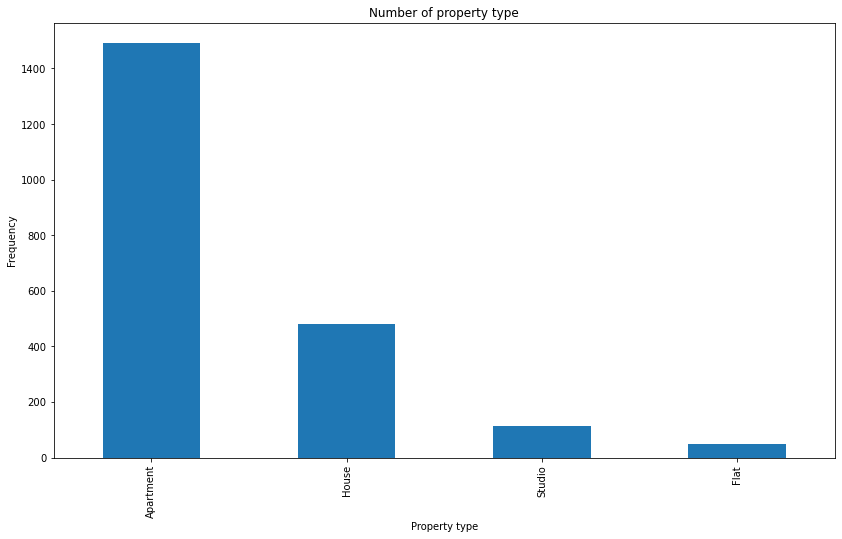

In [16]:
ax = ireland_data['property type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of property type")
ax.set_xlabel("Property type")
ax.set_ylabel("Frequency")
plt.show()

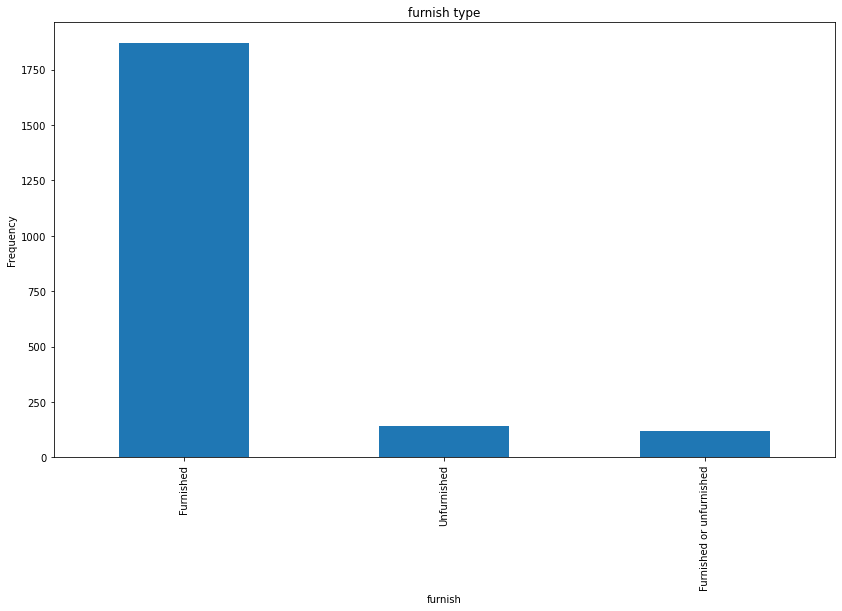

In [17]:
ax = ireland_data['furnish'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="furnish type")
ax.set_xlabel("furnish")
ax.set_ylabel("Frequency")
plt.show()

#### Price per furnish

<AxesSubplot:xlabel='furnish'>

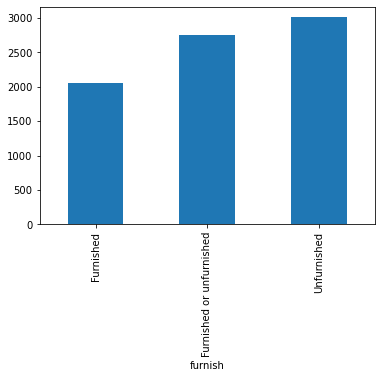

In [18]:
# creating the bar plot
ireland_data.groupby('furnish')['price'].mean().plot.bar()


#### price per property type

<AxesSubplot:xlabel='property type'>

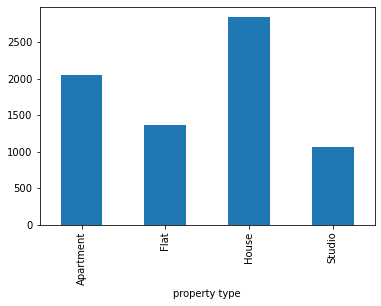

In [19]:
# creating the bar plot
ireland_data.groupby('property type')['price'].mean().plot.bar()


#### Price per bedroom

<AxesSubplot:xlabel='bedroom'>

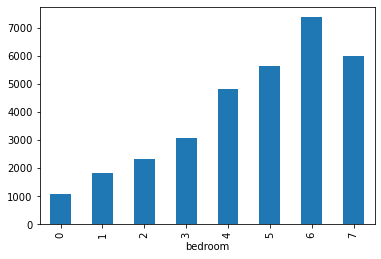

In [20]:
# creating the bar plot
ireland_data.groupby('bedroom')['price'].mean().plot.bar()

<AxesSubplot:xlabel='bathroom'>

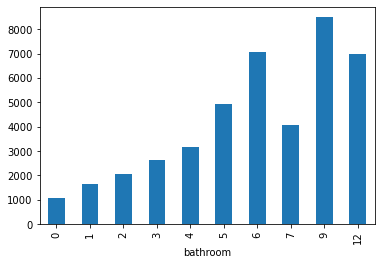

In [21]:
# creating the bar plot
ireland_data.groupby('bathroom')['price'].mean().plot.bar()

### Modelling

##### Preprocessing

In [22]:
#import label encoder
from sklearn import preprocessing 

#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
ireland_data['furnish'] = label_encoder.fit_transform(ireland_data['furnish'])
ireland_data['property type'] = label_encoder.fit_transform(ireland_data['property type'])



In [23]:
# Separating dependent variable and independent variables

X = ireland_data[['bathroom', 'bedroom','property type','furnish']] # independent variables
y = ireland_data['price'] # Dependent variable

In [24]:
# fitting the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [25]:
# display regression coefficients and R-squared value of model

print(model.intercept_, model.coef_, model.score(X, y))

822.283551987832 [364.44098588 347.48503164  24.71116569 161.67711117] 0.43657079107560703


#### 2. Canada

In [26]:
#checking the number of rows and column
canada_data.shape

(1124, 7)

The data has 7 columns and 1124 rows

In [27]:
#checking the missing value
canada_data.isnull().sum()

Bedroom     0
Bathroom    0
Den         0
Address     0
Lat         0
Long        0
Price       0
dtype: int64

In [28]:
canada_data.drop(columns=['Address','Long','Lat'],inplace = True)

In [29]:
canada_data.head()

,Bedroom,Bathroom,Den,Price
0,2,2.0,0,2450.0
1,1,1.0,1,2150.0
2,1,1.0,0,1950.0
3,2,2.0,0,2900.0
4,1,1.0,0,1800.0


In [30]:
canada_data['Price'] = canada_data['Price'] * 0.74

In [31]:
#Descriptive statistics
canada_data.describe()

,Bedroom,Bathroom,Den,Price
count,1124.000000,1124.000000,1124.000000,1124.000000
mean,1.370107,1.237544,0.153025,2684.655480
std,0.553493,0.431997,0.360172,20372.601123
min,1.000000,1.000000,0.000000,48.100000
25%,1.000000,1.000000,0.000000,1301.845000
50%,1.000000,1.000000,0.000000,1554.000000
75%,2.000000,1.000000,0.000000,1850.000000
max,3.000000,3.000000,1.000000,395900.000000


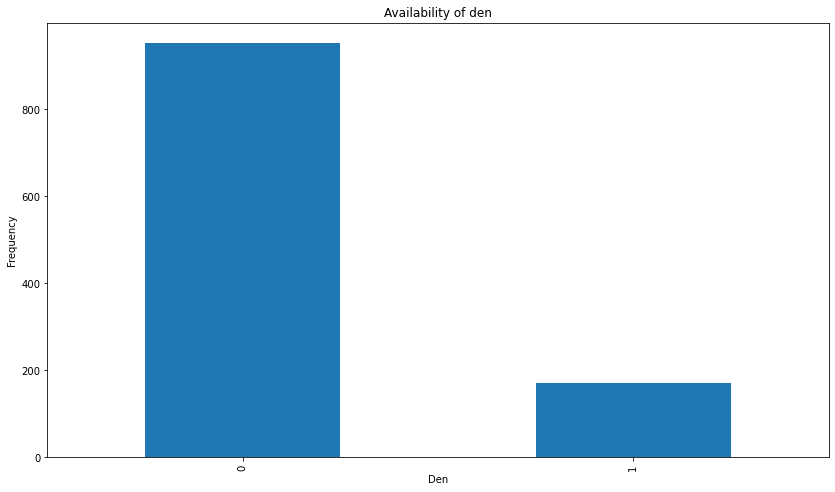

In [32]:
ax = canada_data['Den'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Availability of den")
ax.set_xlabel("Den")
ax.set_ylabel("Frequency")
plt.show()

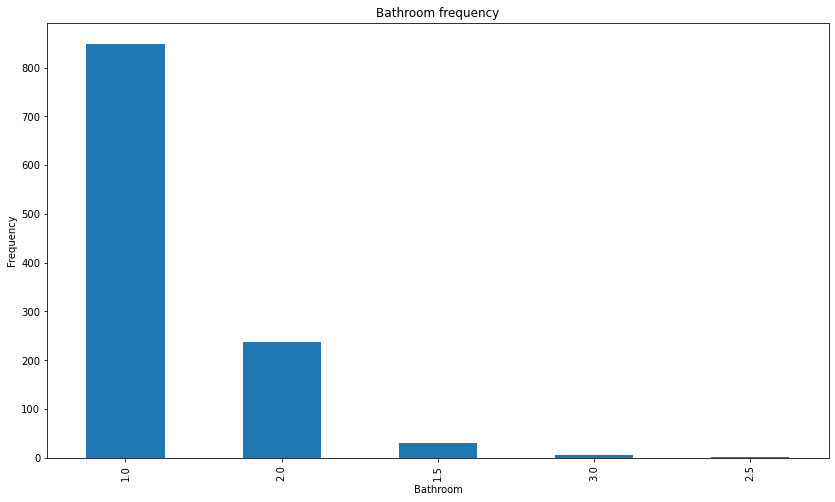

In [33]:
ax = canada_data['Bathroom'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bathroom frequency")
ax.set_xlabel("Bathroom")
ax.set_ylabel("Frequency")
plt.show()

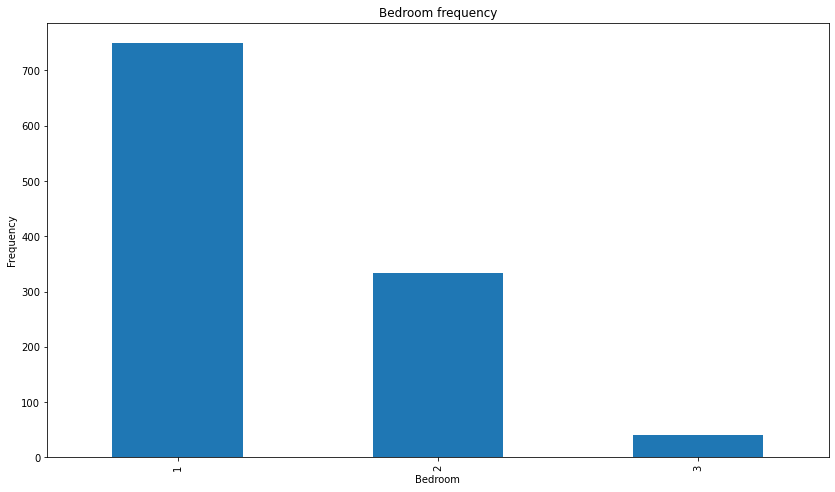

In [34]:
ax = canada_data['Bedroom'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bedroom frequency")
ax.set_xlabel("Bedroom")
ax.set_ylabel("Frequency")
plt.show()

<AxesSubplot:xlabel='Bathroom'>

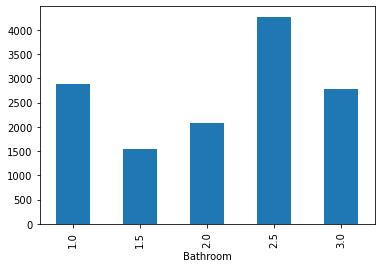

In [35]:
# creating the bar plot
canada_data.groupby('Bathroom')['Price'].mean().plot.bar()

<AxesSubplot:xlabel='Bedroom'>

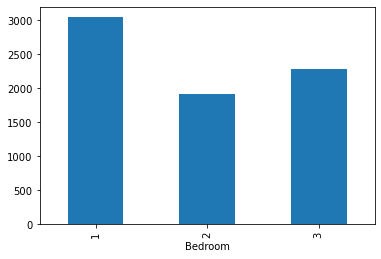

In [36]:
# creating the bar plot
canada_data.groupby('Bedroom')['Price'].mean().plot.bar()

<AxesSubplot:xlabel='Den'>

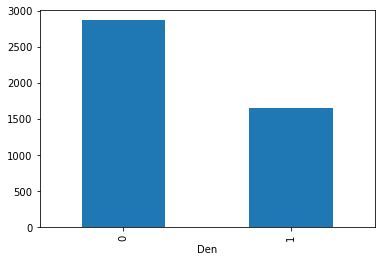

In [37]:
# creating the bar plot
canada_data.groupby('Den')['Price'].mean().plot.bar()

### Modelling

In [38]:
# Separating dependent variable and independent variables

X = canada_data[['Bathroom', 'Bedroom','Den']] # independent variables
y = canada_data['Price'] # Dependent variable

In [39]:
# fitting the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [40]:
# display regression coefficients and R-squared value of model

print(model.intercept_, model.coef_, model.score(X, y))

4502.53596578597 [   42.61081522 -1173.34460634 -1718.7128823 ] 0.001359328358231715


#### 3. Indian data

In [41]:
#checking the number of rows and column
india_data.shape

(4746, 12)

The data has 12 columns and 4746 rows

In [42]:
#checking the missing value
india_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [43]:
#Dropping some columns that are not useful
india_data.drop(columns=['Point of Contact','Tenant Preferred','Posted On'],inplace = True)

In [44]:
#currency conversion
india_data['Rent'] = india_data['Rent'] * 0.012

In [45]:
#Descriptive statistics
india_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,419.921416,967.490729,1.965866
std,0.832256,937.276955,634.202328,0.884532
min,1.000000,14.400000,10.000000,1.000000
25%,2.000000,120.000000,550.000000,1.000000
50%,2.000000,192.000000,850.000000,2.000000
75%,3.000000,396.000000,1200.000000,2.000000
max,6.000000,42000.000000,8000.000000,10.000000


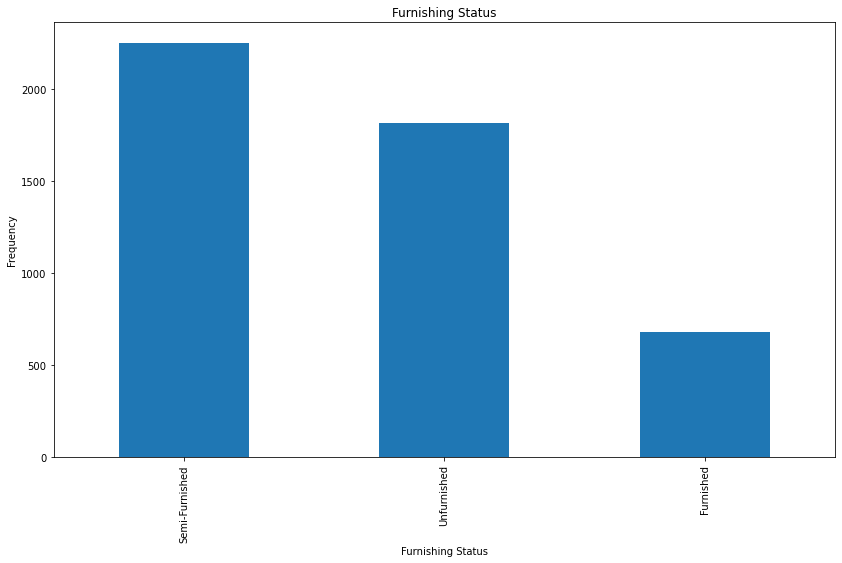

In [46]:
ax = india_data['Furnishing Status'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Furnishing Status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")
plt.show()

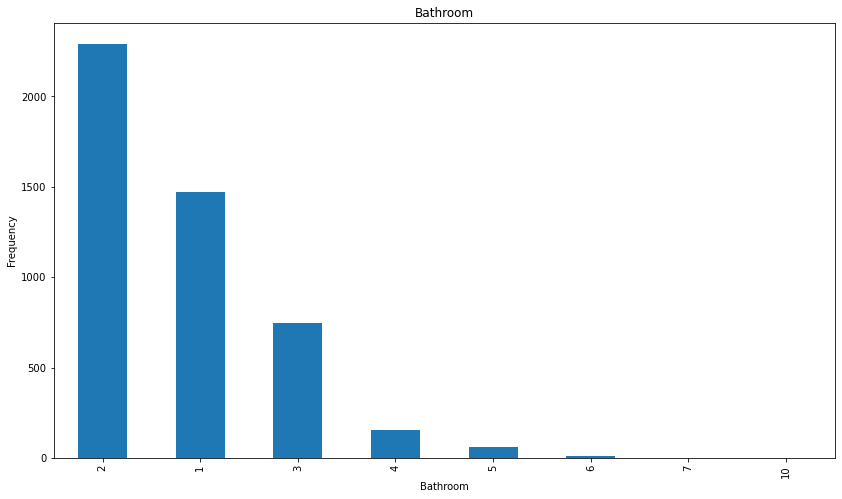

In [47]:
ax = india_data['Bathroom'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bathroom")
ax.set_xlabel("Bathroom")
ax.set_ylabel("Frequency")
plt.show()

<AxesSubplot:xlabel='Furnishing Status'>

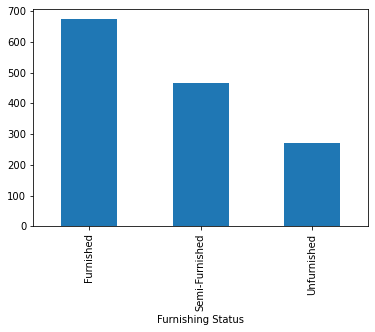

In [48]:
# creating the bar plot
india_data.groupby('Furnishing Status')['Rent'].mean().plot.bar()

<AxesSubplot:xlabel='Bathroom'>

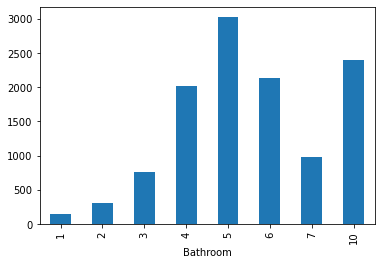

In [49]:
# creating the bar plot
india_data.groupby('Bathroom')['Rent'].mean().plot.bar()

### Prediction

In [50]:
india_data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,120.0,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,2
1,2,240.0,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1
2,2,204.0,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1
3,2,120.0,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,1
4,2,90.0,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1


##### Preprocessing

In [51]:
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
india_data['Floor'] = label_encoder.fit_transform(india_data['Floor'])
india_data['Area Type'] = label_encoder.fit_transform(india_data['Area Type'])
india_data['Area Locality'] = label_encoder.fit_transform(india_data['Area Locality'])
india_data['City'] = label_encoder.fit_transform(india_data['City'])
india_data['Furnishing Status'] = label_encoder.fit_transform(india_data['Furnishing Status'])


In [52]:
# Separating dependent variable and independent variables

X = india_data[['Bathroom', 'Furnishing Status','BHK','Size','Floor','Area Type','Area Locality']] # independent variables
y = india_data['Rent'] # Dependent variable

In [53]:
# fitting the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [54]:
# display regression coefficients and R-squared value of model

print(model.intercept_, model.coef_, model.score(X, y))

143.62081077518366 [ 2.81928997e+02 -7.63375356e+01 -2.65233526e+01  3.12575975e-01
  1.10762107e-01 -2.79971703e+02 -2.91023155e-02] 0.23727634579946466
